Import necessary libraries.

In [397]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

Data comprises of 14 attributes that describe the presence of heart disease in a patient. Dataset was found from the source Kaggle and UCI Machine Learning.

Link: https://www.kaggle.com/ronitf/heart-disease-uci

Load dataset into dataframe.

In [398]:
url = 'https://drive.google.com/uc?export=download&id=1xHAX81G7Q6IcWqbm84QsQdnxuADvrT-8'
df = pd.read_csv(url)
model_accuracies = {}

Show the first 5 elements of the dataset.

In [399]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Compute some basic descriptive information about the data.

In [400]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Show the correlation among the different attributes.

In [401]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Correleation plots using a Heat Map and a Trellis Plot.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:156: UserWarning: The handle <matplotlib.patches.Patch object at 0x7f8977033f50> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)


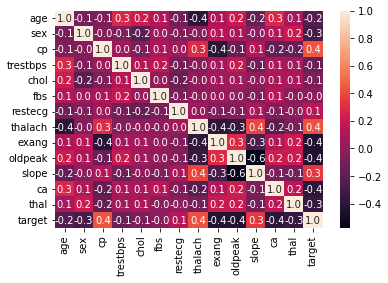

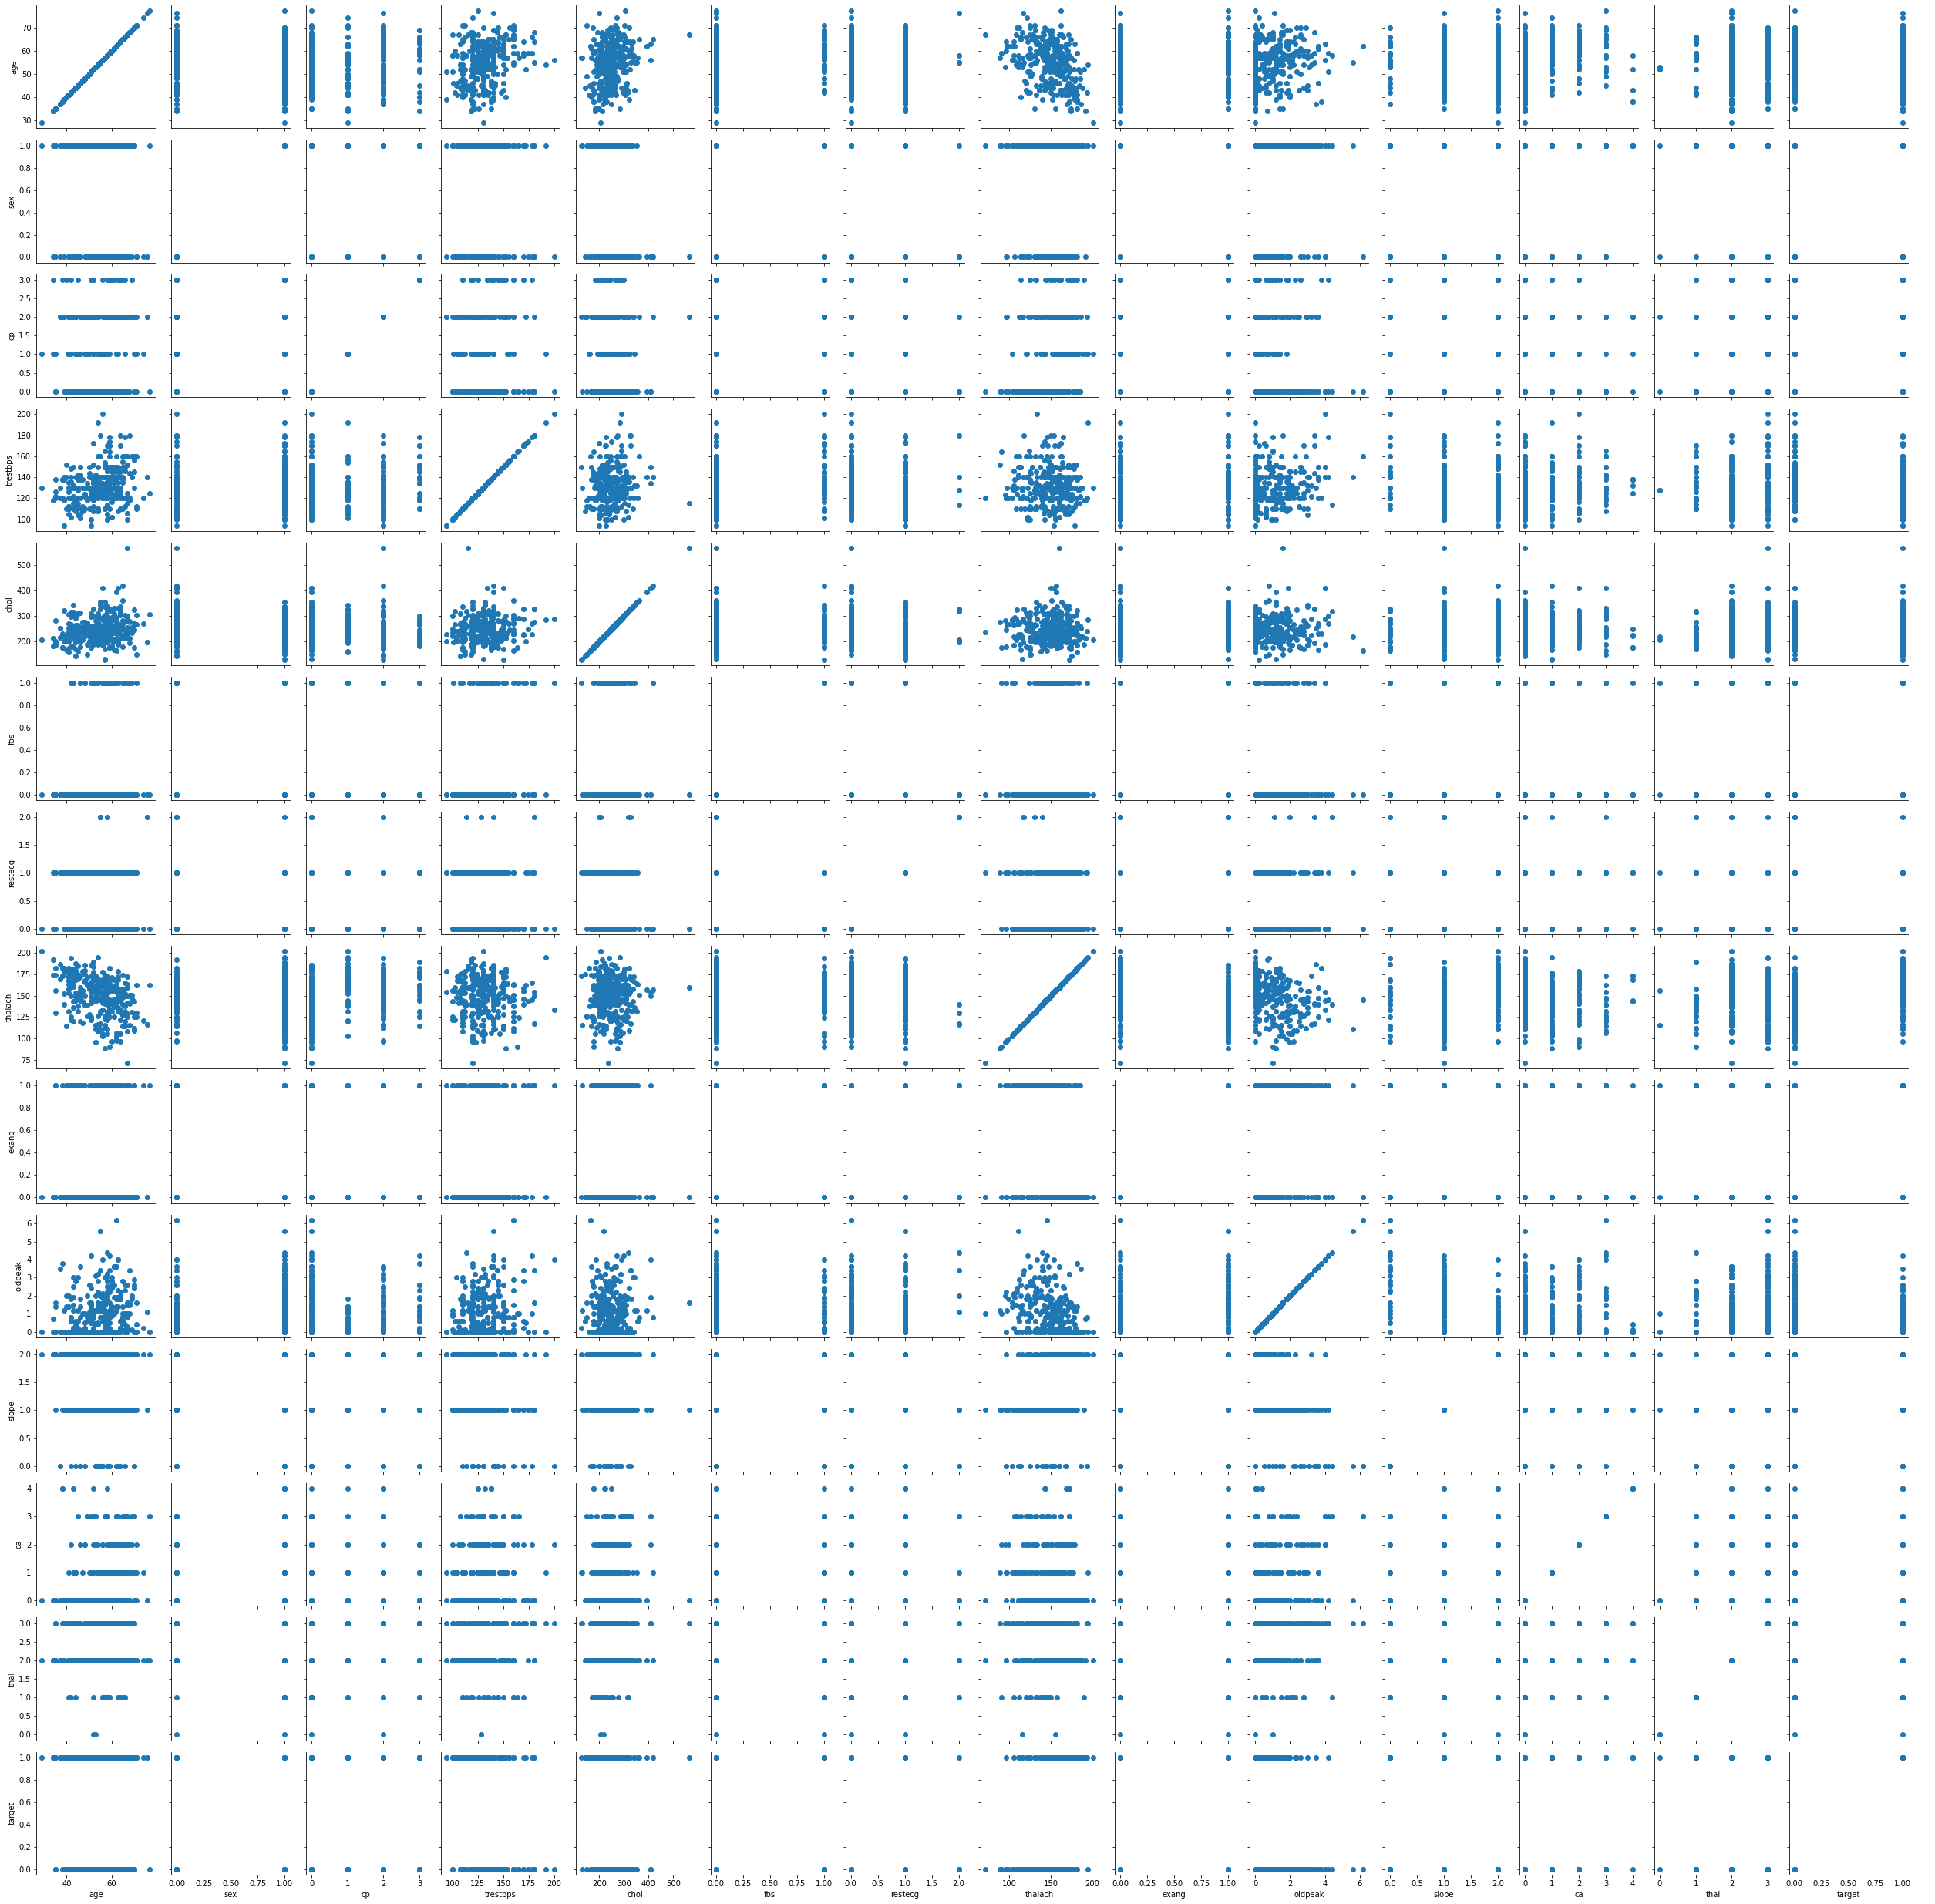

In [402]:
sns.heatmap(df.corr(),annot=True,fmt='.1f')
sns.PairGrid(df).map(plt.scatter).add_legend() 

Obtain X and y values from dataframe.

In [403]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

Split the data into training and testing sets, an 80, 20 split respectively. 

In [404]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Scale the data to avoid the model not converging.


In [405]:
X_scaled = StandardScaler()
X_train = X_scaled.fit_transform(X_train)
X_test = X_scaled.transform(X_test)

##Linear Regression

Linear Regression (intercept=True) prediction.

In [406]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)
print('Test accuracy {:.2f}%'.format(lin_reg.score(X_test,y_test)*100))
model_accuracies["Linear Regression: fit_intercept=True"] = lin_reg.score(X_test,y_test)

Test accuracy 46.90%


Linear Regression (intercept=True) plot.

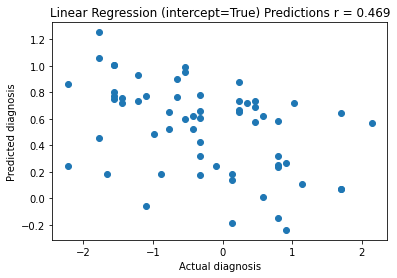

In [407]:
plt.title(f'Linear Regression (intercept=True) Predictions r = {round(lin_reg.score(X_test, y_test), 3)}')
plt.scatter(X_test[:,0], y_pred)
plt.xlabel('Actual diagnosis')
plt.ylabel('Predicted diagnosis')
plt.show()

## Logical Regression

Logical Regression (intercept=False) prediction.

In [408]:
log_reg = LogisticRegression(fit_intercept=False)
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
print('Test accuracy {:.2f}%'.format(log_reg.score(X_test,y_test)*100))
model_accuracies["Logical Regression: fit_intercept=False"] = accuracy_score(y_test, y_pred)

Test accuracy 83.61%


Logical Regression (intercept=False) plot.

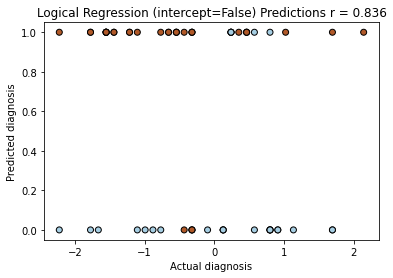

In [409]:
plt.title(f'Logical Regression (intercept=False) Predictions r = {round(log_reg.score(X_test, y_test), 3)}')
plt.scatter(X_test[:,0], y_pred, c=y_test, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Actual diagnosis')
plt.ylabel('Predicted diagnosis')
plt.show()

Performance metrics: precision, recall, f1-score, support.

In [410]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

0.8360655737704918


Logical Regression (intercept=True) prediction.

In [411]:
log_reg = LogisticRegression(fit_intercept=True)
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
print('Test accuracy {:.2f}%'.format(log_reg.score(X_test,y_test)*100))
model_accuracies["Logical Regression: fit_intercept=True"] = accuracy_score(y_test, y_pred)

Test accuracy 85.25%


Logical Regression (intercept=True) plot.

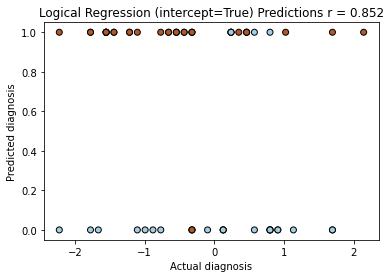

In [412]:
plt.title(f'Logical Regression (intercept=True) Predictions r = {round(log_reg.score(X_test, y_test), 3)}')
plt.scatter(X_test[:,0], y_pred, c=y_test, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Actual diagnosis')
plt.ylabel('Predicted diagnosis')
plt.show()

Performance metrics: precision, recall, f1-score, support.

In [413]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61

0.8524590163934426


##KNN

KNN (n_neighbors=5) prediction.

In [414]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('Test accuracy {:.2f}%'.format(knn.score(X_test,y_test)*100))
model_accuracies["K-Nearest Neighbor: n_neighbors=5"] = accuracy_score(y_test, y_pred)

Test accuracy 81.97%


Performance metrics: precision, recall, f1-score, support.

In [415]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

0.819672131147541


KNN (n_neighbors=8) prediction.

In [416]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('Test accuracy {:.2f}%'.format(knn.score(X_test,y_test)*100))
model_accuracies["K-Nearest Neighbor: n_neighbors=8"] = accuracy_score(y_test, y_pred)

Test accuracy 85.25%


Performance metrics: precision, recall, f1-score, support.

In [417]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

0.8524590163934426


KNN (n_neighbors=10) prediction.

In [418]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('Test accuracy {:.2f}%'.format(knn.score(X_test,y_test)*100))
model_accuracies["K-Nearest Neighbor: n_neighbors=10"] = accuracy_score(y_test, y_pred)

Test accuracy 88.52%


Performance metrics: precision, recall, f1-score, support.

In [419]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61

0.8852459016393442


##Decision Tree

Decision Tree (criterion='gini') prediction.

In [420]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print('Test accuracy {:.2f}%'.format(tree.score(X_test,y_test)*100))
model_accuracies["Decision Tree: criterion='gini'"] = accuracy_score(y_test, y_pred)

Test accuracy 75.41%


Performance metrics: precision, recall, f1-score, support.

In [421]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.81      0.75        27
           1       0.83      0.71      0.76        34

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61

0.7540983606557377


Decision Tree (criterion='entropy') prediction.

In [422]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print('Test accuracy {:.2f}%'.format(tree.score(X_test,y_test)*100))
model_accuracies["Decision Tree: criterion='entropy'"] = accuracy_score(y_test, y_pred)

Test accuracy 75.41%


Performance metrics: precision, recall, f1-score, support.

In [423]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.81      0.75        27
           1       0.83      0.71      0.76        34

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61

0.7540983606557377


## SVC

SVC (kernel='linear, C=[0.001, 0.01, 0.1, 1]) prediction.

In [424]:
y_preds = []
for c in [0.001, 0.01, 0.1, 1]:
  svc = SVC(kernel='linear', C=c)
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  y_preds.append(y_pred)
  print('Test accuracy (c=' + str(c) + ') {:.2f}%'.format(svc.score(X_test,y_test)*100))
  model_accuracies["SVC: C=" + str(c)] = accuracy_score(y_test, y_pred)
y_preds = np.array(y_preds)

Test accuracy (c=0.001) 65.57%
Test accuracy (c=0.01) 83.61%
Test accuracy (c=0.1) 80.33%
Test accuracy (c=1) 81.97%


Performance metrics: precision, recall, f1-score, support.

In [425]:
x,y = y_preds.shape
for p in range(x):
  print(classification_report(y_test, y_preds[p]))
  print(accuracy_score(y_test, y_preds[p]))

              precision    recall  f1-score   support

           0       1.00      0.22      0.36        27
           1       0.62      1.00      0.76        34

    accuracy                           0.66        61
   macro avg       0.81      0.61      0.56        61
weighted avg       0.79      0.66      0.59        61

0.6557377049180327
              precision    recall  f1-score   support

           0       0.90      0.70      0.79        27
           1       0.80      0.94      0.86        34

    accuracy                           0.84        61
   macro avg       0.85      0.82      0.83        61
weighted avg       0.85      0.84      0.83        61

0.8360655737704918
              precision    recall  f1-score   support

           0       0.83      0.70      0.76        27
           1       0.79      0.88      0.83        34

    accuracy                           0.80        61
   macro avg       0.81      0.79      0.80        61
weighted avg       0.81      0.80   

Accuracy score for each model and hyper-parameter sorted from highest to lowest.

In [426]:
print('Models sorted by accuracy score:')
model_accuracies = dict(reversed(sorted(model_accuracies.items(), key=lambda item: item[1])))
for m in model_accuracies:
  print('{}: {:.2f}%'.format(m, model_accuracies[m] * 100))

Models sorted by accuracy score:
K-Nearest Neighbor: n_neighbors=10: 88.52%
K-Nearest Neighbor: n_neighbors=8: 85.25%
Logical Regression: fit_intercept=True: 85.25%
SVC: C=0.01: 83.61%
Logical Regression: fit_intercept=False: 83.61%
SVC: C=1: 81.97%
K-Nearest Neighbor: n_neighbors=5: 81.97%
SVC: C=0.1: 80.33%
Decision Tree: criterion='entropy': 75.41%
Decision Tree: criterion='gini': 75.41%
SVC: C=0.001: 65.57%
Linear Regression: fit_intercept=True: 46.90%
